In [1]:
import yfinance as yf

# Define the stock symbol and time period for which you want to extract data
ticker = 'TSLA'  # Ticker symbol for Tesla
start_date = '2010-01-01'  # Start date for the data
end_date = '2023-04-13'  # End date for the data

# Use yfinance to get the historical stock data for Tesla
tesla_data = yf.download(ticker, start=start_date, end=end_date)

# Print the extracted data
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [17]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text
soup = BeautifulSoup(html_data)
data = []
for table in soup.find_all("table"):
    
    if any(["Tesla Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text
            })

tesla_revenue = pd.DataFrame(data)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail(5)

C:\Users\kumar\AppData\Local\Temp\ipykernel_11860\2048632997.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


,Date,Revenue
50,2010-09-30,31
51,2010-06-30,28
52,2010-03-31,21
54,2009-09-30,46
55,2009-06-30,27


In [19]:
import yfinance as yf

# Define the ticker symbol for GameStop
ticker = "GME"

# Use yfinance to get GameStop stock data
gme_stock = yf.Ticker(ticker)

# Get historical stock data for GameStop
gme_history = gme_stock.history(period="max")

# Print the historical stock data
print(gme_history)


                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691666   
2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2002-02-15 00:00:00-05:00   1.683251   1.687459   1.658002   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2023-04-18 00:00:00-04:00  22.139999  22.320000  21.500000  21.610001   
2023-04-19 00:00:00-04:00  21.280001  21.870001  20.959999  21.309999   
2023-04-20 00:00:00-04:00  20.879999  21.570000  20.059999  20.219999   
2023-04-21 00:00:00-04:00  20.200001  20.620001  20.100000  20.490000   
2023-04-24 00:00:00-04:00  20.200001  20.410000  19.809999  19.940001   

                             Volume  Dividends  St

In [20]:
!pip install beautifulsoup4
!pip install requests


In [21]:
import requests
from bs4 import BeautifulSoup


In [22]:
# Send a GET request to the GameStop revenue webpage
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')


In [23]:
data = []
for table in soup.find_all("table"):
    
    if any(["GameStop Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text.replace("$", "").replace(",", "")
            })

gme_revenue = pd.DataFrame(data)

In [24]:
gme_revenue.tail()

,Date,Revenue
52,2010-01-31,3524
53,2009-10-31,1835
54,2009-07-31,1739
55,2009-04-30,1981
56,2009-01-31,3492


In [36]:
!pip install matplotlib
!pip install plotly


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [32]:
# Load stock data
stock_df = pd.read_csv("C:/Users/kumar/Downloads/TSLA.csv")
# Convert 'Date' column to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
# Set 'Date' as the index
stock_df.set_index('Date', inplace=True)

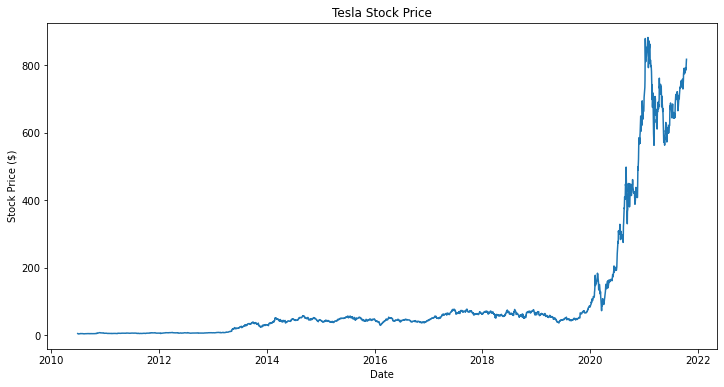

In [33]:
# Create a line chart for Tesla's stock price
plt.figure(figsize=(12, 6))
plt.plot(stock_df.index, stock_df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.title('Tesla Stock Price')
plt.show()

In [ ]:
# Create a bar chart for Tesla's revenue
plt.figure(figsize=(12, 6))
plt.bar(revenue_df.index, revenue_df['Revenue'])
plt.xlabel('Year')
plt.ylabel('Revenue ($ billions)')
plt.title('Tesla Revenue')
plt.show()
# Create an interactive line chart for Tesla's stock price using Plotly
fig = px.line(stock_df, x=stock_df.index, y='Close', labels={'x': 'Date', 'y': 'Stock Price ($)'},
              title='Tesla Stock Price')
fig.show()